# this notebook is for binning error bars to a fixed resolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from binning import bin_errs, calc_bin_widths, white_light_curve

In [2]:
pandexo_errs = np.loadtxt('./pandexo_output/pandexo_errs.txt').T
pandexo_errs_100 = np.loadtxt('./pandexo_output/pandexo_errs_100.txt').T

In [3]:
x, y, e = pandexo_errs               # native instrument resolution (still haven't figured out)
x100, y100, e100 = pandexo_errs_100  # pandexo R = 100

### For reference, here are the error curves produced with Pandexo. I'm trying to take the unbinned pandexo errors (black) and bin them myself, and it should match pandexo's $R = 100$ binned errors (blue).

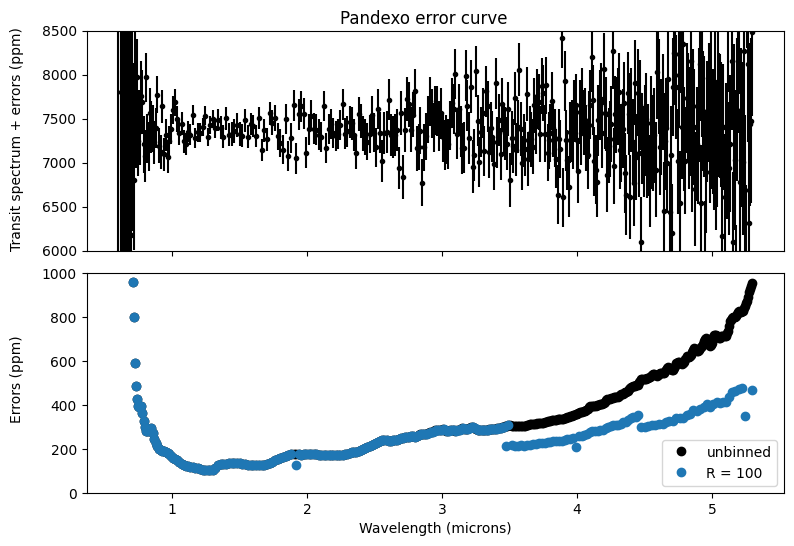

In [4]:
fig, axs = plt.subplots(2, 1, figsize = (9,6), sharex = True)
fig.subplots_adjust(hspace = 0.1)

axs[0].errorbar(x, y, e, fmt = '.', c = 'black')
axs[1].plot(x, e, 'o', label = 'unbinned', c = 'black')
axs[1].plot(x100, e100, 'o', label = 'R = 100')

axs[0].set_ylim(6000,8500)
axs[1].set_ylim(0, 1000)

# Labels
fig.suptitle('Pandexo error curve', y = 0.915)
fig.text(0.04, 0.3, 'Errors (ppm)', va='center', rotation='vertical')
fig.text(0.04, 0.7, 'Transit spectrum + errors (ppm)', va='center', rotation='vertical')
axs[1].set_xlabel('Wavelength (microns)')
axs[1].legend()
plt.show()

### Using my binning function to bin to resolution R, and then comparing to Pandexo

In [5]:
R = 100
new_errs, new_wave, dellambs = bin_errs(x, e, R)

/Users/coffey/Downloads/kipping/first-year-project/binning.py:98: RuntimeWarning: divide by zero encountered in scalar divide
  standard_err = np.sqrt(1 / np.sum(weights))


In [6]:
# gonna plot x errbars on Pandexo R100 errors to see if they don't overlap
pandexo_bin_widths = calc_bin_widths(x100, R = 100)

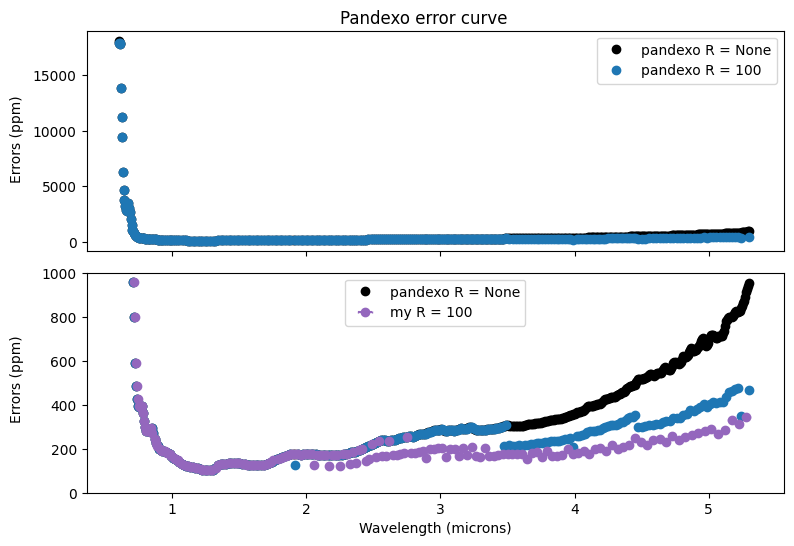

In [7]:
fig, axs = plt.subplots(2, 1, figsize = (9,6), sharex = True)
fig.subplots_adjust(hspace = 0.1)

axs[0].plot(x, e, 'o', c = 'black', label = 'pandexo R = None')
axs[0].plot(x100, e100, 'o', c = 'tab:blue', label = 'pandexo R = 100')
#axs[0].set_ylim(0, 1000)
axs[0].legend()

# need to half the bin widths for errobar plotting
axs[1].errorbar(x100, e100, None, np.array(pandexo_bin_widths)/2, 'o', c = 'tab:blue')
axs[1].errorbar(new_wave, new_errs, None, np.array(dellambs)/2, 'o', capsize = 1, c = 'tab:purple', label = 'my R = 100')
axs[1].plot(x, e, 'o', c = 'black', label = 'pandexo R = None')

#axs[1].set_xlim(2,3)
axs[1].set_ylim(0, 1000)
axs[1].set_xlabel('Wavelength (microns)')
axs[1].legend(loc = 'upper center')

# Labels
fig.suptitle('Pandexo error curve', y = 0.915)
fig.text(0.04, 0.3, 'Errors (ppm)', va='center', rotation='vertical')
fig.text(0.04, 0.7, 'Errors (ppm)', va='center', rotation='vertical')
plt.show()

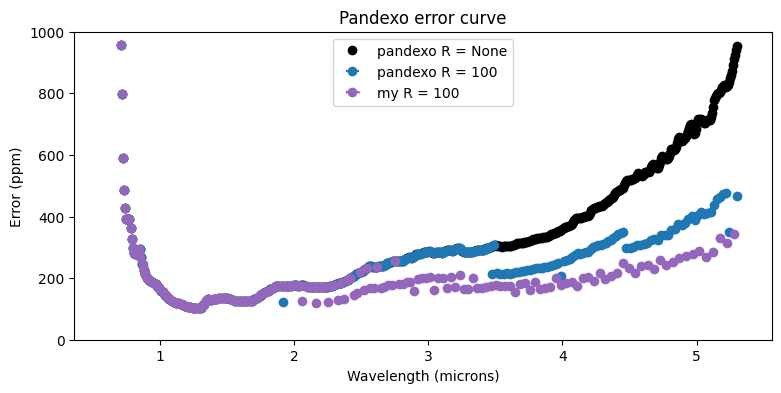

In [8]:
plt.figure(figsize = (9,4))

# need to half the bin widths for errorbar plotting
plt.errorbar(x100, e100, None, np.array(pandexo_bin_widths)/2, 'o', c = 'tab:blue', label = 'pandexo R = 100')
plt.errorbar(new_wave, new_errs, None, np.array(dellambs)/2, 'o', capsize = 1, c = 'tab:purple', label = 'my R = 100')
plt.plot(x, e, 'o', c = 'black', label = 'pandexo R = None')

# Axes limits
#plt.xlim(2,3)
plt.ylim(0, 1000)

# Labels
plt.title('Pandexo error curve')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Error (ppm)')

plt.legend()
plt.show()

### checking if the bin spacing increases with wavelength as expected

In [9]:
# calculating pandexo's native resolution bin spacing
pandexo_dellambs = []
for i in range(len(x)):
    if i == 0:
        dellamb = x[i+1] - x[i]
    elif i == len(x) - 1:
        dellamb = x[i] - x[i-1]
    else:
        dellamb = (x[i+1] - x[i-1]) / 2
    pandexo_dellambs.append(dellamb)

In [10]:
# calculating pandexo's R = 100 bin spacing
pandexo_dellambs100 = []
for i in range(len(x100)):
    if i == 0:
        dellamb100 = x100[i+1] - x100[i]
    elif i == len(x100) - 1:
        dellamb100 = x100[i] - x100[i-1]
    else:
        dellamb100 = (x100[i+1] - x100[i-1]) / 2
    pandexo_dellambs100.append(dellamb100)

# slope of best fit line gives R
my_R      = np.polyfit(np.array(dellambs)[:-1], new_wave[:-1], 1)[0]
pandexo_RNone = np.polyfit(pandexo_dellambs, x, 1)[0]
pandexo_R100 = np.polyfit(pandexo_dellambs100, x100, 1)[0]
print(f'My binned errors are at R = {my_R:.2f} (excluding last bin) , but Pandexo is R = {pandexo_RNone:.2f} and {pandexo_R100:.2f}?')

My binned errors are at R = 100.00 (excluding last bin) , but Pandexo is R = -175.03 and 142.62?


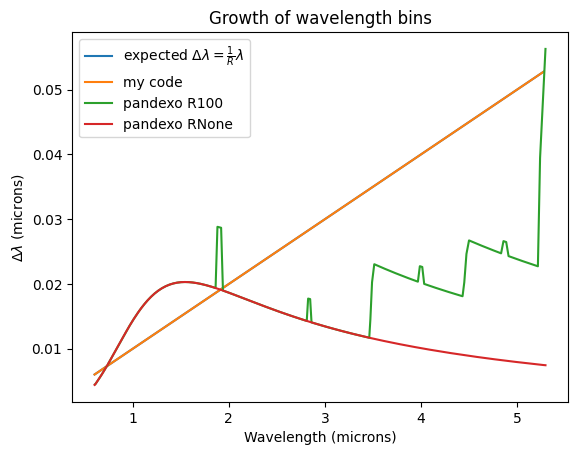

In [11]:
plt.plot(new_wave, np.array(new_wave) / R, label = r'expected $\Delta\lambda = \frac{1}{R}\lambda$')
plt.plot(new_wave, np.array(dellambs), label = 'my code')
plt.plot(x100, pandexo_dellambs100, label = 'pandexo R100')
plt.plot(x, pandexo_dellambs, label = 'pandexo RNone')

plt.title('Growth of wavelength bins')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'$\Delta\lambda$ (microns)')

plt.legend()
plt.show()

### comparing the white light curves R = 1

In [12]:
w_x, w_e, w_bin_width             = white_light_curve(x, e)               # pandexo R = None
w_x100, w_e100, w_bin_width100    = white_light_curve(x100, e100)         # pandexo R = 100
w_new_wave, w_new_errs, w_dellamb = white_light_curve(new_wave, np.array(new_errs)) # my R = 100

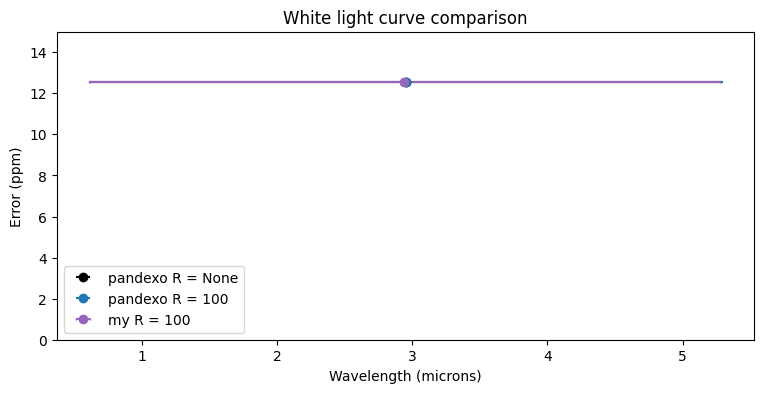

In [13]:
plt.figure(figsize = (9,4))

# need to half the bin widths for errorbar plotting
plt.errorbar(w_x, w_e, None, w_bin_width / 2, 'o', c = 'black', label = 'pandexo R = None')
plt.errorbar(w_x100, w_e100, None, w_bin_width100 / 2, 'o', c = 'tab:blue', label = 'pandexo R = 100')
plt.errorbar(w_new_wave, w_new_errs, None, w_dellamb / 2, 'o', capsize = 1, c = 'tab:purple', label = 'my R = 100')

# Axes limits
plt.ylim(0,15)

# Labels
plt.title('White light curve comparison')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Error (ppm)')

plt.legend()
plt.show()